In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_palette("pastel")

In [98]:
metrics_df = pd.read_csv('OrigFiles/ProteinAndPathologyQuantifications.csv')
donor_df = pd.read_csv('OrigFiles/DonorInformation.csv')  
donor_df['act_demented'] = donor_df['act_demented'].apply(lambda x: 1 if x =='Dementia' else 0)
metrics_donor_df = pd.merge(metrics_df, donor_df,  how='left', left_on='donor_id', right_on = 'donor_id')

metrics_df.head()


,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,2.68,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,3.02,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,0.80,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,1.30,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,0.00,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263


In [99]:
tau_df= metrics_df[(metrics_df["ihc_at8_ffpe"].notnull()) & (metrics_df["ptau_ng_per_mg"].notnull())]
tau_corr = stats.pearsonr(x= tau_df["ihc_at8_ffpe"],y= tau_df["ptau_ng_per_mg"])
print(tau_corr)

(0.6762564820133992, 5.548704562131172e-44)


In [100]:
#None/weak correlation between ab40 and ab42
abeta_df= metrics_df[(metrics_df["ab40_pg_per_mg"].notnull()) & (metrics_df["ab42_pg_per_mg"].notnull())]
abeta_corr = stats.pearsonr(x= abeta_df["ab40_pg_per_mg"],y= abeta_df["ab42_pg_per_mg"])
print(abeta_corr)

(0.1147351219158445, 0.03665429738103489)


In [101]:
#None/very weak correlation between ab42 and pTua
ab_tau_df= metrics_df[(metrics_df["ab42_pg_per_mg"].notnull()) & (metrics_df["ptau_ng_per_mg"].notnull())]
ab_tau_corr = stats.pearsonr(x= ab_tau_df["ab42_pg_per_mg"],y= ab_tau_df["ptau_ng_per_mg"])
print(ab_tau_corr)

(0.12463665857288304, 0.02312967104874397)


In [140]:
ab_tau_corrs=[] 
#weak correlation between ab42(Aβ IHC) and pTua(at8)
ab_tau_df= metrics_df[(metrics_df["ihc_a_beta_ffpe"].notnull()) & (metrics_df["ihc_at8_ffpe"].notnull())]
ab_tau_corr = stats.pearsonr(x= ab_tau_df["ihc_a_beta_ffpe"],y= ab_tau_df["ihc_at8_ffpe"])
ab_tau_corrs.append(['Overall', ab_tau_corr[0]])
print(ab_tau_corr)
print(ab_tau_corrs)


(0.3287971049505127, 2.2742501348784835e-10)
[['Overall', 0.3287971049505127]]


### Explore Aβ and pTau correlations in different brain regions

In [141]:

for region in ['HIP','TCx', 'PCx','FWM' ]:
    ab_tau_df= metrics_df[(metrics_df["structure_acronym"]==region) &(metrics_df["ihc_a_beta_ffpe"].notnull()) & (metrics_df["ihc_at8_ffpe"].notnull())]
    ab_tau_corr = stats.pearsonr(x= ab_tau_df["ihc_a_beta_ffpe"],y= ab_tau_df["ihc_at8_ffpe"])
    print(region, ab_tau_corr)
    ab_tau_corrs.append([region, ab_tau_corr[0]])

print(ab_tau_corrs)

HIP (0.4639123218403715, 1.1351962794404712e-05)
TCx (0.4891760015391139, 7.499201489625886e-07)
PCx (0.4593489353182052, 5.955701824652233e-06)
FWM (0.03124349919486403, 0.768761231650275)
[['Overall', 0.3287971049505127], ['HIP', 0.4639123218403715], ['TCx', 0.4891760015391139], ['PCx', 0.4593489353182052], ['FWM', 0.03124349919486403]]


In [137]:
ab_tau_braak_corrs=[]
metrics_donor_df['braak'] = metrics_donor_df['braak'].astype('Int64')
for stage in range(0, 7):
    ab_tau_df= metrics_donor_df[(metrics_donor_df["braak"]==stage) &(metrics_donor_df["ihc_a_beta_ffpe"].notnull()) & (metrics_donor_df["ihc_at8_ffpe"].notnull())]
    ab_tau_corr = stats.pearsonr(x= ab_tau_df["ihc_a_beta_ffpe"],y= ab_tau_df["ihc_at8_ffpe"])
    print(stage, ab_tau_corr)
    ab_tau_braak_corrs.append([stage, ab_tau_corr[0]])

print(ab_tau_braak_corrs)

0 (-0.21321875709450047, 0.581755517734284)
1 (0.06276706765610571, 0.716104162061927)
2 (0.12116246687569136, 0.42787219371227564)
3 (0.07834357995072493, 0.4504584077065122)
4 (0.08520821434522405, 0.5362240240458942)
5 (0.31979592567212367, 0.01840862167233609)
6 (0.379977503938324, 0.0027483041076459044)
[[0, -0.21321875709450047], [1, 0.06276706765610571], [2, 0.12116246687569136], [3, 0.07834357995072493], [4, 0.08520821434522405], [5, 0.31979592567212367], [6, 0.379977503938324]]


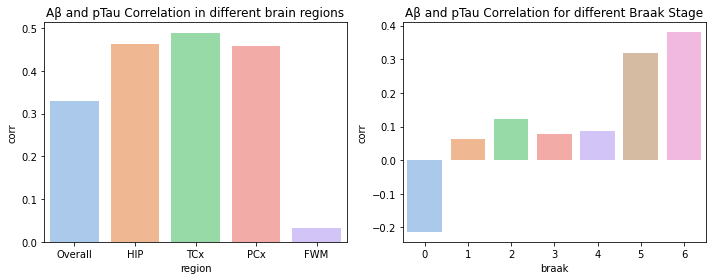

In [146]:
ab_tau_corr_df=pd.DataFrame(ab_tau_corrs)
ab_tau_corr_df.columns =['region', 'corr']
#print(ab_tau_corr_df)
ab_tau_braak_corr_df=pd.DataFrame(ab_tau_braak_corrs)
ab_tau_braak_corr_df.columns =['braak', 'corr']
#print(ab_tau_braak_corr_df)

fig, axs = plt.subplots(1,2,figsize=(10,4))

sns.barplot(x = 'region', y = 'corr', ax=axs[0],  data = ab_tau_corr_df)
axs[0].set_title("Aβ and pTau Correlation in different brain regions")

sns.barplot(x = 'braak', y = 'corr', ax=axs[1],  data = ab_tau_braak_corr_df)
axs[1].set_title("Aβ and pTau Correlation for different Braak Stage")
fig.tight_layout()

### loop through all columns of donor and metrics tables, find variables are moderate/strong correlated.

In [105]:
cat_columns = donor_df.select_dtypes(['object']).columns
#convert all categorical variables to numeric
donor_df[cat_columns] = donor_df[cat_columns].apply(lambda x: pd.factorize(x)[0])
donor_df.head()

,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
0,326765665,0,0,0,0,16,0,0,0,0,0,31,0,0,0,0,0,1,1
1,326765656,1,1,0,0,17,12,1,2,1,0,26,0,1,0,0,0,5,2
2,326765654,2,2,0,1,10,72,2,3,1,1,25,1,1,0,0,1,4,2
3,467056391,3,3,1,0,11,87,2,0,1,0,52,0,1,0,0,0,4,0
4,309335447,4,4,0,1,16,0,0,3,0,2,28,2,0,0,0,1,4,2


In [106]:
#correlation of metrics_df every column with dementia
metrics_cols = metrics_df.columns[4:]
donor_cols = donor_df.columns[4:]
for d_col in donor_cols:
    for m_col in metrics_cols:
        m_d_df= metrics_donor_df[(metrics_donor_df[d_col].notnull()) & (metrics_donor_df[m_col].notnull())]
        m_d_corr = stats.pearsonr(x= m_d_df[d_col],y= m_d_df[m_col])
        if abs(m_d_corr[0])>0.40:
            print(d_col, m_col, m_d_corr)

cerad ihc_at8_ffpe (0.4051938717678685, 1.070412109310059e-15)
cerad ihc_a_beta_ffpe (0.41425476591610755, 3.7453000033977836e-16)
cerad ihc_a_beta (0.4282266479796276, 3.033327119843467e-18)
cerad ab42_pg_per_mg (0.62761583510749, 9.168185977691922e-38)
braak ihc_at8_ffpe (0.46283597247734437, 1.4493218343289927e-20)
braak ihc_at8 (0.40707494982252806, 1.76313216296573e-16)
braak ab42_pg_per_mg (0.4601637171500878, 8.39844096934779e-19)
nia_reagan ihc_at8_ffpe (0.4447881629417397, 6.114732311924984e-19)
nia_reagan ihc_a_beta (0.40142194431413386, 4.977938941768262e-16)
nia_reagan ab42_pg_per_mg (0.5838724552630605, 9.994088309422352e-32)


In [114]:
for d_col in metrics_cols:
    for m_col in metrics_cols:
        m_d_df= metrics_donor_df[(metrics_donor_df[d_col].notnull()) & (metrics_donor_df[m_col].notnull())]
        m_d_corr = stats.pearsonr(x= m_d_df[d_col],y= m_d_df[m_col])
        if ((abs(m_d_corr[0])>0.50) & (m_d_corr[0]<0.95)):
            print(d_col, m_col, m_d_corr)

ihc_tau2_ffpe ihc_at8_ffpe (0.6590651516197381, 1.7946500954329812e-45)
ihc_tau2_ffpe ihc_at8 (0.6763469776309124, 6.194998312549917e-49)
ihc_tau2_ffpe ptau_ng_per_mg (0.6051738508732878, 5.91011639310331e-33)
ihc_tau2_ffpe ptau_over_tau_ratio (0.6203267614330228, 2.3464917514500706e-34)
ihc_at8_ffpe ihc_tau2_ffpe (0.6590651516197381, 1.7946500954329812e-45)
ihc_at8_ffpe ihc_at8 (0.77535788009529, 1.183813658071359e-73)
ihc_at8_ffpe ptau_ng_per_mg (0.6762564820133992, 5.548704562131172e-44)
ihc_at8_ffpe ptau_over_tau_ratio (0.6435910981454245, 5.352925620697561e-38)
ihc_at8 ihc_tau2_ffpe (0.6763469776309124, 6.194998312549917e-49)
ihc_at8 ihc_at8_ffpe (0.77535788009529, 1.183813658071359e-73)
ihc_at8 ptau_ng_per_mg (0.7591503209995857, 1.6755552261915065e-63)
ihc_at8 ptau_over_tau_ratio (0.7548415599456922, 2.6570988241358383e-61)
ihc_a_beta_ffpe ihc_a_beta (0.6735514732864205, 2.874132651546675e-48)
ihc_a_beta ihc_a_beta_ffpe (0.6735514732864205, 2.874132651546675e-48)
ihc_a_beta ab42

Text(0.03, 9, 'TCx,PCx')

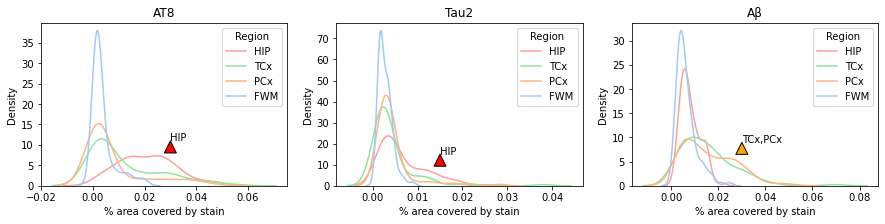

In [148]:
fig, axs = plt.subplots(1,3,figsize=(15,3))

sns.kdeplot(data=metrics_df, x="ihc_at8_ffpe",  hue="structure_acronym", ax=axs[0], palette='pastel', legend=False)
axs[0].set_title("AT8")
axs[0].set_xlabel("% area covered by stain")
axs[0].legend(title="Region",loc='upper right', labels=['HIP','TCx', 'PCx','FWM' ])

axs[0].annotate('HIP', xy =(0.03, 11),  arrowprops = dict(facecolor ='red',  shrink = 0.05))

sns.kdeplot(data=metrics_df, x="ihc_tau2_ffpe",  hue="structure_acronym", ax=axs[1], palette='pastel', legend=False)
axs[1].set_title("Tau2")
axs[1].set_xlabel("% area covered by stain")
axs[1].legend(title="Region",loc='upper right', labels=['HIP','TCx', 'PCx','FWM' ])
axs[1].annotate('HIP', xy =(0.015, 15),  arrowprops = dict(facecolor ='red'))

sns.kdeplot(data=metrics_df, x="ihc_a_beta_ffpe",  hue="structure_acronym", ax=axs[2], palette='pastel', legend=False)
axs[2].set_title("Aβ")
axs[2].set_xlabel("% area covered by stain")
axs[2].legend(title="Region",loc='upper right', labels=['HIP','TCx', 'PCx','FWM' ])
axs[2].annotate('TCx,PCx', xy =(0.03, 9), arrowprops = dict(facecolor ='orange',  shrink = 0.05))


0 (-0.21321875709450047, 0.581755517734284)
1 (0.06276706765610571, 0.716104162061927)
2 (0.12116246687569136, 0.42787219371227564)
3 (0.07834357995072493, 0.4504584077065122)
4 (0.08520821434522405, 0.5362240240458942)
5 (0.31979592567212367, 0.01840862167233609)
6 (0.379977503938324, 0.0027483041076459044)
[[0, -0.21321875709450047], [1, 0.06276706765610571], [2, 0.12116246687569136], [3, 0.07834357995072493], [4, 0.08520821434522405], [5, 0.31979592567212367], [6, 0.379977503938324]]


In [115]:
# we removed the FWM sample for the Aβ and ptau analysis for different braak stage
sample_nofwm_df = metrics_donor_df[metrics_donor_df['structure_acronym']!='FWM']
print(sample_nofwm_df.shape)


(284, 51)


In [131]:
metrics_donor_df['cerad'].value_counts()

1    109
2     95
3     94
0     79
Name: cerad, dtype: int64

In [117]:
sample_nofwm_df['braak'] = sample_nofwm_df['braak'].astype('Int64')
braak0 = sample_nofwm_df['ihc_a_beta'][(sample_nofwm_df['braak']>=0) & (sample_nofwm_df['braak']<=2)].reset_index(drop=True)
braak1 = sample_nofwm_df['ihc_a_beta'][(sample_nofwm_df['braak']>=3) & (sample_nofwm_df['braak']<=4)].reset_index(drop=True)
braak2 = sample_nofwm_df['ihc_a_beta'][(sample_nofwm_df['braak']>=5) & (sample_nofwm_df['braak']<=6)].reset_index(drop=True)
#braak_df=pd.concat([braak0, braak1, braak2],axis=1).astype('Int64')
braak_df=pd.concat([braak0, braak1, braak2],axis=1)
braak_df.columns=['0-2', '3-4', '5-6']
braak_melt_df = pd.melt(braak_df)
braak_melt_df= braak_melt_df.dropna()
braak_melt_df= braak_melt_df.dropna()
braak_melt_df.columns=['Braak Stage', 'Aβ']

In [122]:
sample_nofwm_df['braak'] = sample_nofwm_df['braak'].astype('Int64')
braak_list =[]
for i in range(0, 7):
    braak_list.append(sample_nofwm_df['ihc_a_beta'][sample_nofwm_df['braak']==i].reset_index(drop=True))

braak_df=pd.concat(braak_list,axis=1)
braak_df.columns=['0', '1', '2', '3', '4', '5', '6']
braak_melt_df = pd.melt(braak_df)
braak_melt_df= braak_melt_df.dropna()
braak_melt_df= braak_melt_df.dropna()
braak_melt_df.columns=['Braak Stage', 'Aβ']

In [123]:
braak_melt_df.head()

,Braak Stage,Aβ
0,0,0.008108
1,0,0.005797
2,0,0.006305
3,0,0.001745
4,0,0.004187


<AxesSubplot:title={'center':'Age and CERAD Score'}, xlabel='Braak Stage', ylabel='Aβ'>

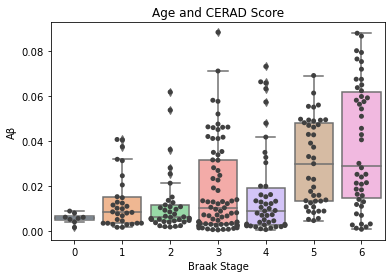

In [124]:
sns.boxplot(x='Braak Stage', y='Aβ', data=braak_melt_df).set(title='Aβ and Braak Stage')
sns.swarmplot(x='Braak Stage', y='Aβ', data=braak_melt_df,color=".25")

In [126]:
sample_nofwm_df['braak'] = sample_nofwm_df['braak'].astype('Int64')
braak_list =[]
for i in range(0, 7):
    braak_list.append(sample_nofwm_df['ihc_at8_ffpe'][sample_nofwm_df['braak']==i].reset_index(drop=True))

braak_df=pd.concat(braak_list,axis=1)
braak_df.columns=['0', '1', '2', '3', '4', '5', '6']
braak_melt_df = pd.melt(braak_df)
braak_melt_df= braak_melt_df.dropna()
braak_melt_df= braak_melt_df.dropna()
braak_melt_df.columns=['Braak Stage', 'pTau']

<AxesSubplot:title={'center':'pTau and Braak Stage'}, xlabel='Braak Stage', ylabel='pTau'>

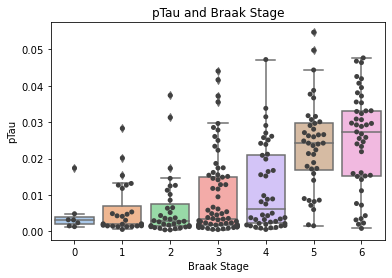

In [127]:
sns.boxplot(x='Braak Stage', y='pTau', data=braak_melt_df).set(title='pTau and Braak Stage')
sns.swarmplot(x='Braak Stage', y='pTau', data=braak_melt_df,color=".25")